In [18]:
import pandas as pd
import io
import requests
url="https://news.google.com/covid19/map?hl=en-US&gl=US&ceid=US%3Aen"
s=requests.get(url).content
c=pd.read_html(url)

In [20]:
df = c[0]
df.head(10)

,Location,Total cases,New cases (1 day*),New cases (last 60 days),Cases per 1M people,Deaths
0,Worldwide,49114225,No data,NaN,6316,1239757
1,United States,9804707,121504,NaN,29751,236375
2,India,8411724,47638,NaN,6183,124985
3,Brazil,5590025,0,NaN,26451,161106
4,Russia,1699695,19116,NaN,11583,29285
5,France,1605171,57340,NaN,23931,38730
6,Spain,1306316,21908,NaN,27735,38486
7,Argentina,1217028,11100,NaN,27082,32766
8,United Kingdom,1123197,24138,NaN,16907,48120
9,Colombia,1117977,9891,NaN,22633,32209


In [24]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [41]:
data.head(605)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,06/11/2020,6,11,2020,40,0,Afghanistan,AF,AFG,38041757.0,Asia,3.546103
1,05/11/2020,5,11,2020,121,6,Afghanistan,AF,AFG,38041757.0,Asia,3.745884
2,04/11/2020,4,11,2020,86,4,Afghanistan,AF,AFG,38041757.0,Asia,3.782685
3,03/11/2020,3,11,2020,95,3,Afghanistan,AF,AFG,38041757.0,Asia,3.787943
4,02/11/2020,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.0,Asia,3.766913
...,...,...,...,...,...,...,...,...,...,...,...,...
600,12/09/2020,12,9,2020,264,8,Algeria,DZ,DZA,43053054.0,Africa,10.101490
601,11/09/2020,11,9,2020,272,10,Algeria,DZ,DZA,43053054.0,Africa,10.387184
602,10/09/2020,10,9,2020,278,10,Algeria,DZ,DZA,43053054.0,Africa,10.677524
603,09/09/2020,9,9,2020,285,9,Algeria,DZ,DZA,43053054.0,Africa,10.939990


In [71]:
tab = data.groupby(['geoId']).sum()

In [104]:
tab[['cases', 'deaths']]

,cases,deaths
geoId,,
AD,5135,75
AE,138599,508
AF,41975,1554
AG,130,3
AI,3,0
...,...,...
XK,22206,720
YE,2067,602
ZA,732414,19677


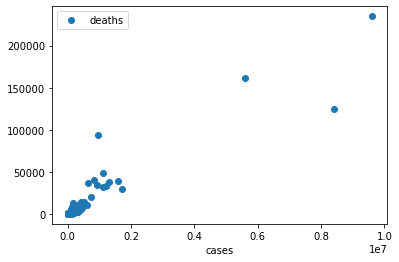

In [83]:
tab.plot(x='cases', y='deaths', style='o')

In [89]:
from sklearn.linear_model import LinearRegression
X = tab[['cases']]
y = tab[['deaths']]
reg = LinearRegression().fit(X, y)

In [93]:
reg.coef_*100

array([[2.22899606]])

In [95]:
tab['ratio'] = tab['deaths'] / tab['cases']


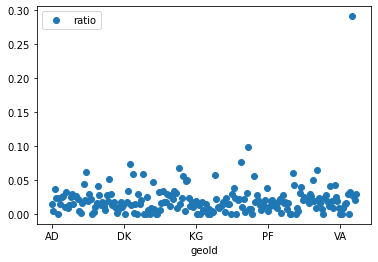

In [112]:
tab.reset_index()
tab.plot( y='ratio', use_index=True, style='o')

In [116]:
tab['ratio'].mean()

0.020837678901672603

In [115]:
tab['ratio'].std()

0.024908019658996614